In [1]:
!pip install cartopy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 3.4 MB/s  0:00:03m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 3.6 MB/s  0:00:02 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 3.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [cartopy]m3/4 [cartopy]


/home/cwoo/miniconda3/lib/python3.13/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/cwoo/miniconda3/lib/python3.13/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/cwoo/miniconda3/lib/python3.13/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/cwoo/miniconda3/lib/python3.13/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/cwoo/miniconda3/lib/python3.13/site-p

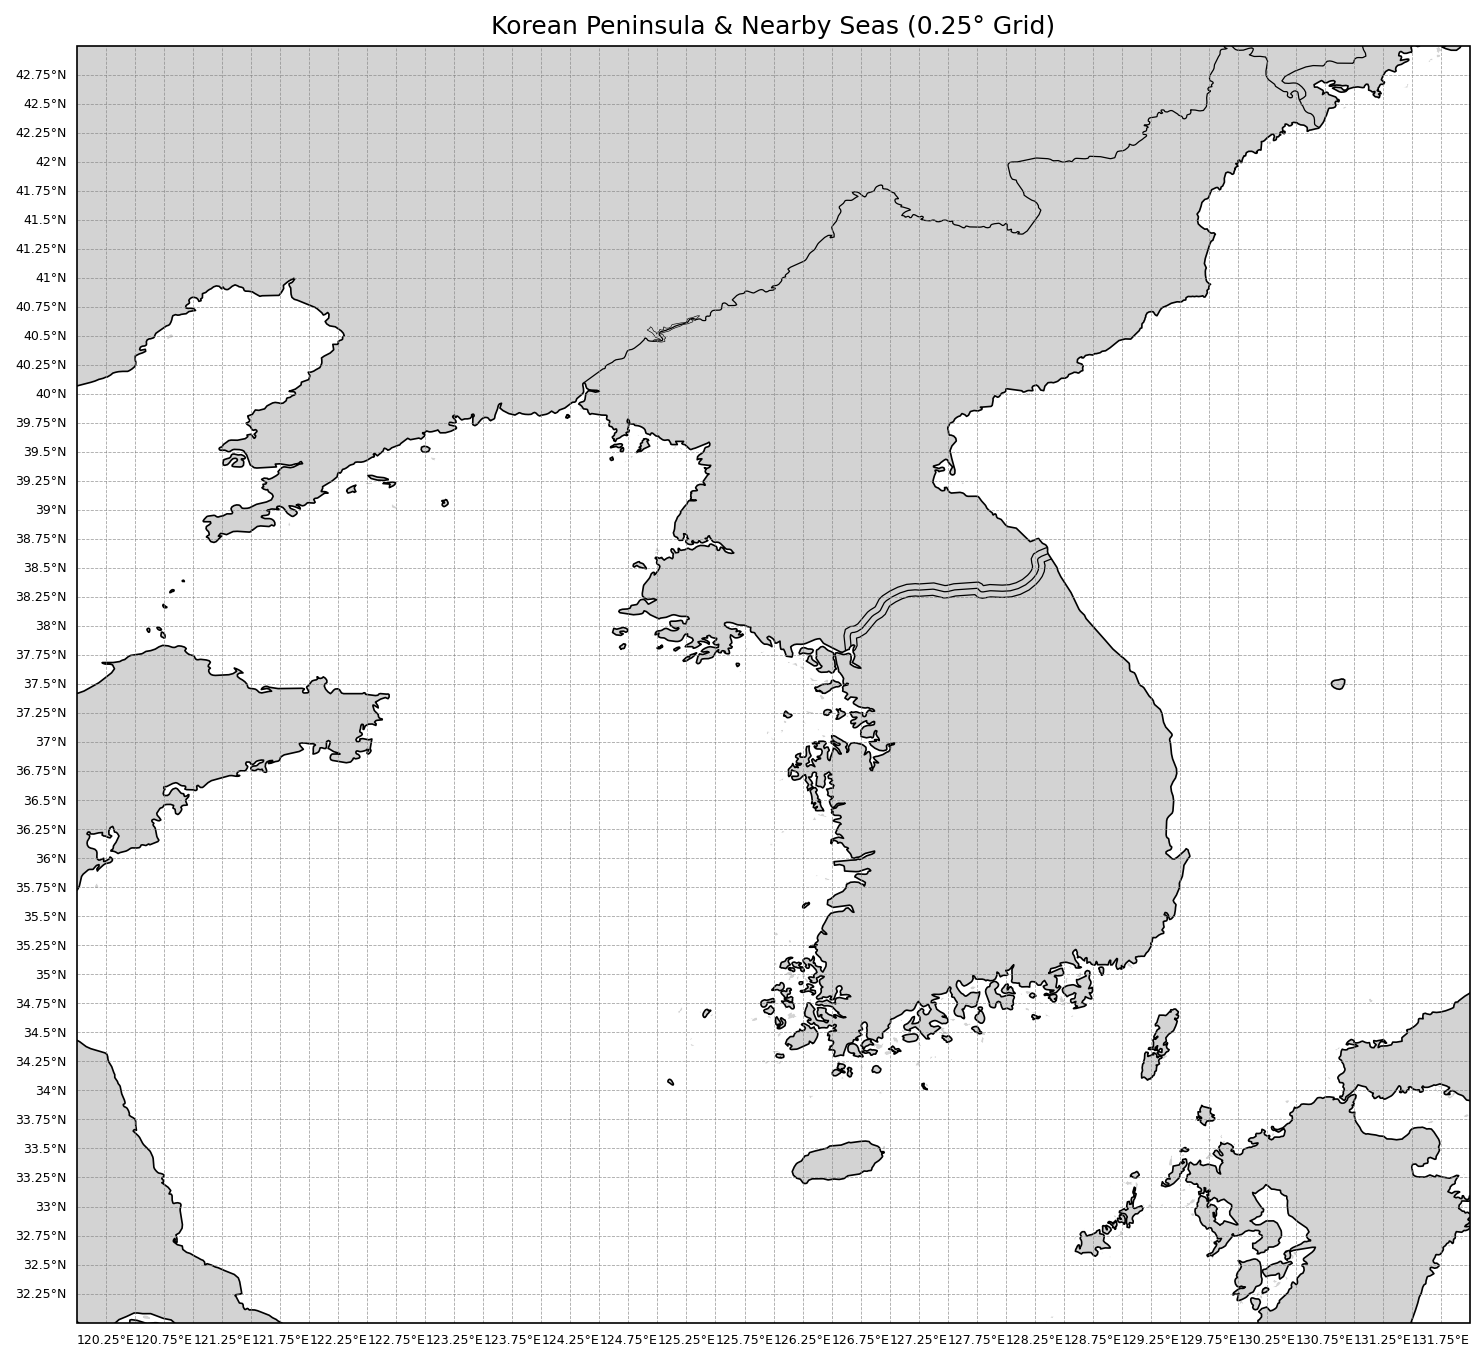

In [2]:

import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

# ---- Map extent (adjust as needed) ----
# Covers the Korean Peninsula + nearby seas (Yellow Sea, Korea Strait, Sea of Japan/East Sea)
lon_min, lon_max = 120.0, 132.0
lat_min, lat_max = 32.0, 43.0

# ---- Grid spacing ----
dlon = 0.25
dlat = 0.25

# Create tick locations
xticks = np.arange(lon_min, lon_max + 1e-9, dlon)
yticks = np.arange(lat_min, lat_max + 1e-9, dlat)

# ---- Figure / Axes ----
fig = plt.figure(figsize=(10, 10), dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# ---- Basemap features ----
ax.add_feature(cfeature.LAND, facecolor="lightgray", zorder=0)
ax.add_feature(cfeature.OCEAN, facecolor="white", zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.8, zorder=2)
ax.add_feature(cfeature.BORDERS, linewidth=0.6, zorder=2)

# Optional: lakes/rivers (can be slow at high resolution)
ax.add_feature(cfeature.LAKES, edgecolor="black", facecolor="none", linewidth=0.3, zorder=2)

# ---- Gridlines at 0.25° ----
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=0.4,
    color="gray",
    alpha=0.7,
    linestyle="--",
    xlocs=xticks,
    ylocs=yticks,
)

# Label formatting / placement
gl.top_labels = False
gl.right_labels = False

# Make labels smaller (important because 0.25° labels are dense)
gl.xlabel_style = {"size": 6}
gl.ylabel_style = {"size": 6}

# ---- Title ----
ax.set_title("Korean Peninsula & Nearby Seas (0.25° Grid)", fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
import cdsapi

dataset = "reanalysis-era5-single-levels"
request = {
    "product_type": ["reanalysis"],
    "variable": [
        "10m_u_component_of_wind",
        "10m_v_component_of_wind"
    ],
    "year": ["2024"],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "time": [
        "00:00", "01:00", "02:00",
        "03:00", "04:00", "05:00",
        "06:00", "07:00", "08:00",
        "09:00", "10:00", "11:00",
        "12:00", "13:00", "14:00",
        "15:00", "16:00", "17:00",
        "18:00", "19:00", "20:00",
        "21:00", "22:00", "23:00"
    ],
    "data_format": "netcdf",
    "download_format": "unarchived",
    "area": [43, 120, 32, 132]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()


2026-01-05 16:52:22,624 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2026-01-05 16:52:23,602 INFO [2025-12-11T00:00:00] Please note that a dedicated catalogue entry for this dataset, post-processed and stored in Analysis Ready Cloud Optimized (ARCO) format (Zarr), is available for optimised time-series retrievals (i.e. for retrieving data from selected variables for a single point over an extended period of time in an efficient way). You can discover it [here](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels-timeseries?tab=overview)
2026-01-05 16:52:23,602 INFO Request ID is 4281340c-86ed-4bfc-b85c-9d6e2714723b
2026-01-05 16:52:23,891 INFO status has been updated to accepted
2026-01-05 16:52:33,205 INFO status has been updated to running
